# ***The Spark Foundation***

## **Task 1: Prediction using Supervised ML**

**Dataset Link: http://bit.ly/w-data**

**Name of the author: Sayali Redasani**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

#### Reading the data

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

#### Getting insights from the data

In [3]:
# Basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# Shape of the dataset
data.shape
print("Number of rows: " , data.shape[0])
print("Number of columns: " , data.shape[1])

Number of rows:  25
Number of columns:  2


In [5]:
# Count of isNull values if any
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
#Statistic analysis
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<Axes: >

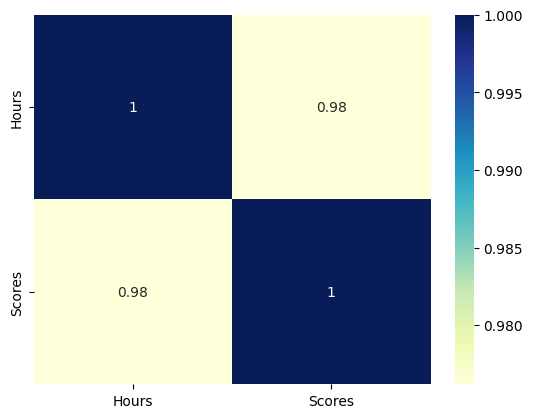

In [8]:
# Visualization
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

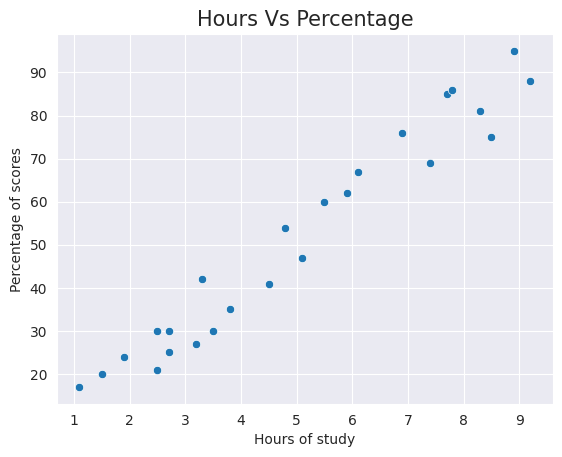

In [9]:
# Plotting distributions of score
sns.set_style("darkgrid")
X = data["Hours"]
y = data["Scores"]
sns.scatterplot(x=X, y=y)
plt.title("Hours Vs Percentage", fontsize = 15)
plt.xlabel("Hours of study", fontsize = 10)
plt.ylabel("Percentage of scores", fontsize = 10)
plt.show()

#### Inference: Hours of study and Percentage show a positive linear relationship.

## Model Building

In [10]:
# Splitting the data: Features(x) and label(y)
X = data.iloc[:,:-1].values
y = data.iloc[:, 1].values

In [11]:
# Splitting the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [12]:
print( " X train : " , X_train.shape)
print( " X test : ", X_test.shape)
print(" y train : ", y_train.shape)
print( " y test : " , y_test.shape)

 X train :  (20, 1)
 X test :  (5, 1)
 y train :  (20,)
 y test :  (5,)


In [13]:
# Linear Regression model
lr = LinearRegression()


In [14]:
#Training
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
# Evaluation
print(lr.score(X_train, y_train))

0.9589264169005701


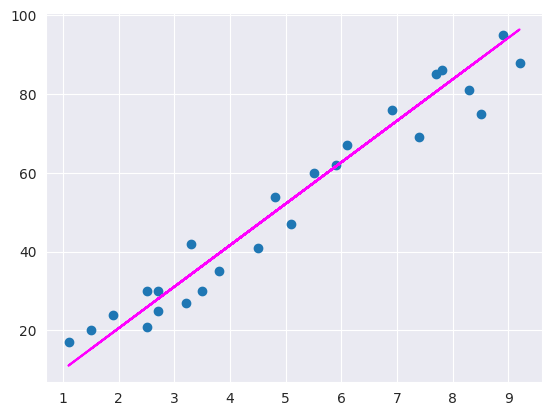

In [16]:
line = lr.coef_*X+lr.intercept_

plt.scatter(X,y)
plt.plot(X, line, color="magenta")
plt.show()

In [17]:
#Prediction over test data
y_pred = lr.predict(X_test)

In [18]:
predicted_per=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
predicted_per

,Actual,predicted
0,85,80.613827
1,69,77.454355
2,88,96.411189
3,17,11.105437
4,75,89.039087


In [19]:
user_hours = [[9.25]]
user_prediction = lr.predict(user_hours)
print( " Based on {} hours studied, user will get a score of {}".format(user_hours, user_prediction))

 Based on [[9.25]] hours studied, user will get a score of [96.93776732]


In [20]:
# we will check for another

user_hours = [[5.5]]
user_prediction = lr.predict(user_hours)
print( " Based on {} hours studied, user will get a score of {}".format(user_hours, user_prediction))

 Based on [[5.5]] hours studied, user will get a score of [57.44436402]


In [21]:
# Evaluating the model
print("Mean absolute error: " , metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error:  8.237073106534178


## Thus for 9.25 hours of study, a student will get 96.93 percent